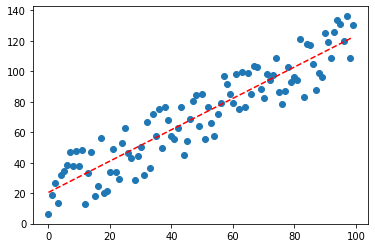

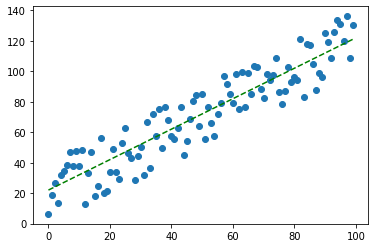

In [49]:
import numpy
from matplotlib import pyplot


def get_axes(n):
    x = range(n)
    delta = numpy.random.uniform(0, 40, size=[n])
    y = x + delta
    return x, y


def plot_axes(x, y, hx, line):
    pyplot.scatter(x, y)
    pyplot.plot(x, hx, line)
    pyplot.show()


def numpy_least_squares_implementation(x, y):
    coefficients = numpy.polyfit(x, y, deg=1)
    h = numpy.poly1d(coefficients) 
    hx = h(x)
    return hx


def my_least_squares_implementation(x, y):
    h_theta = lambda x, theta_a, theta_b: \
        theta_a * x + theta_b

    sums = {}
    theta_a = 0
    while theta_a < 20:
        theta_b = 0

        while theta_b < 40:
            deltas = [
                (h_theta(i, theta_a, theta_b) - y[i]) ** 2 
                for i in x
            ]
            delta_sum = sum(deltas)
            sums[delta_sum] = [theta_a, theta_b]

            theta_b += 0.5

        theta_a += 0.5
 
                
    least_sum = min(sums.keys())
    hx = [h_theta(i, *sums[least_sum]) for i in x]
    
    return hx

    
if __name__ == '__main__':
    x, y = get_axes(n=100)
    
    numpy_hx = numpy_least_squares_implementation(x, y)
    plot_axes(x, y, numpy_hx, '--r') 
    
    my_hx = my_least_squares_implementation(x, y)
    plot_axes(x, y, my_hx, '--g')
